<a href="https://colab.research.google.com/github/syous154/Project/blob/main/Train_image_%EB%B0%B0%EA%B2%BD%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import torchvision.models as models
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import random

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dataset/train.csv')
df.head()

,id,img_path,A,B,C,D,E,F,G,H,I,J
0,TRAIN_00000,./train/TRAIN_00000.jpg,1,0,0,0,0,0,0,0,0,0
1,TRAIN_00001,./train/TRAIN_00001.jpg,1,0,0,0,0,0,0,0,0,0
2,TRAIN_00002,./train/TRAIN_00002.jpg,1,0,0,0,0,0,0,0,0,0
3,TRAIN_00003,./train/TRAIN_00003.jpg,1,0,0,0,0,0,0,0,0,0
4,TRAIN_00004,./train/TRAIN_00004.jpg,1,0,0,0,0,0,0,0,0,0


In [ ]:
CFG = {
    'IMG_SIZE':224,
    'EPOCHS': 20,
    'LEARNING_RATE':3e-4,
    'BATCH_SIZE':32,
    'SEED':41
}

In [ ]:
from sklearn.model_selection import train_test_split
def get_labels(df):
    return df.iloc[:,2:].values

train, test, train_labels, test_labels = train_test_split(df, get_labels(df),
                                                     test_size=0.2, random_state=42)
val, test, val_labels, test_labels = train_test_split(test, get_labels(test),
                                                     test_size=0.5, random_state=42)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, transforms=None):
        self.img_path_list = img_path_list
        self.label_list = label_list
        self.transforms = transforms
        
    def __getitem__(self, index):
        img_path = self.img_path_list[index]
        idx = random.randint(0,9)
        BACKGROUND = "/content/drive/MyDrive/Colab_Notebooks/dataset/background"+str(idx)+".jpg"
        image = cv2.imread(img_path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        img_bin = np.array(img[:, :, 0] < 250, dtype=np.uint8) * 255
        img_blur = cv2.medianBlur(img_bin, 5)
        img_filter = img.copy()
        img_filter[img_blur == 0] = 0
        retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img_blur)
        stats = np.array(stats)
        stats[0, -1] = 0
        label_idx = np.argmax(stats[:, -1])
        img_mask = labels == label_idx
        img_final = img_filter.copy()
        img_final[~img_mask] = (0, 0, 0)

        img_back = cv2.resize(cv2.cvtColor(cv2.imread(BACKGROUND),cv2.COLOR_BGR2RGB), img.shape[::-1][1:])
        img_back[img_mask] = (0, 0, 0)
        img_filter += img_back
        image = img_filter
        if self.transforms is not None:
            image = self.transforms(image=image)['image']
        
        if self.label_list is not None:
            label = torch.FloatTensor(self.label_list[index])
            return image, label
        else:
            return image
        
    def __len__(self):
        return len(self.img_path_list)


In [ ]:
train_transform = A.Compose([
                            A.Resize(CFG['IMG_SIZE'],CFG['IMG_SIZE']),
                            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0),
                            ToTensorV2()
                            ])

In [ ]:
train_dataset = CustomDataset('/content/drive/MyDrive/Colab_Notebooks/dataset/train/'+train['id'].values+'.jpg', train_labels, train_transform)
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=0)


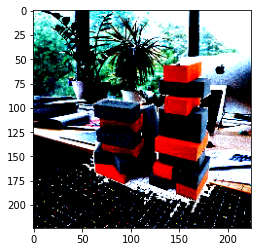

In [ ]:
for img, label in iter(train_loader):
  img = np.transpose(img, (0, 2, 3, 1))
  plt.imshow(img[0])
  break

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Colab_Notebooks/dataset/train/'


In [ ]:
img_list = []
for i in range(len(train)):
  img_list.append(DATA_PATH + str(train['id'][i]) +'.jpg')
#img_list
img_list[len(train) - 1]

'/content/drive/MyDrive/Colab_Notebooks/dataset/train/TRAIN_32993.jpg'

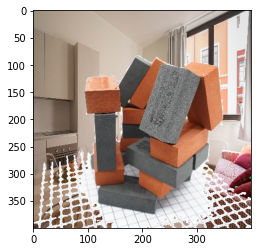

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset//TRAIN_32993.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_bin = np.array(img[:, :, 0] < 250, dtype=np.uint8) * 255
img_blur = cv2.medianBlur(img_bin, 5)
img_filter = img.copy()
img_filter[img_blur == 0] = 0
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img_blur)
stats = np.array(stats)
stats[0, -1] = 0
label_idx = np.argmax(stats[:, -1])
img_mask = labels == label_idx
img_final = img_filter.copy()
img_final[~img_mask] = (0, 0, 0)

img_back = cv2.resize(cv2.cvtColor(cv2.imread(BACKGROUND),cv2.COLOR_BGR2RGB), img.shape[::-1][1:])
img_back[img_mask] = (0, 0, 0)
img_filter += img_back
plt.imshow(img_filter)

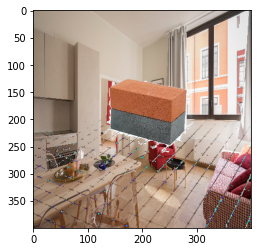

In [ ]:
for img_l in img_list[:9]:
  img = cv2.imread(img_l)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img_bin = np.array(img[:, :, 0] < 250, dtype=np.uint8) * 255
  img_blur = cv2.medianBlur(img_bin, 5)
  img_filter = img.copy()
  img_filter[img_blur == 0] = 0
  retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img_blur)
  stats = np.array(stats)
  stats[0, -1] = 0
  label_idx = np.argmax(stats[:, -1])
  img_mask = labels == label_idx
  img_final = img_filter.copy()
  img_final[~img_mask] = (0, 0, 0)

  
  img_back = cv2.resize(cv2.cvtColor(cv2.imread(BACKGROUND),cv2.COLOR_BGR2RGB), img.shape[::-1][1:])
  img_back[img_mask] = (0, 0, 0)
  img_filter += img_back
  #img_filter = cv2.cvtColor(img_filter, cv2.COLOR_RGB2GRAY)
  plt.imshow(img_filter)

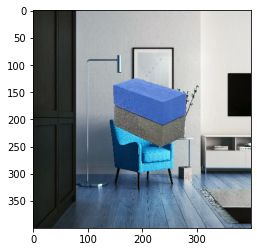

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dataset/test.csv')
test.head()

,id,img_path
0,TEST_00000,./test/TEST_00000.jpg
1,TEST_00001,./test/TEST_00001.jpg
2,TEST_00002,./test/TEST_00002.jpg
3,TEST_00003,./test/TEST_00003.jpg
4,TEST_00004,./test/TEST_00004.jpg


[[199 186 121 ... 122  95  70]
 [198 170 139 ...  96  76  78]
 [186 169 150 ...  74  78  96]
 ...
 [186 174 190 ... 194 192 185]
 [186 186 181 ... 178 177 172]
 [167 149 145 ... 172 176 172]]


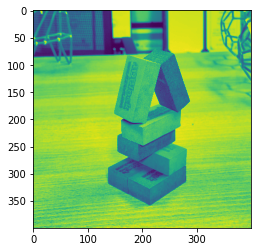

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset/test/TEST_00000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
print(img)

In [ ]:
img_px = []
row = []
col = []
for i in range(400):
  for j in range(400):
    if img[i][j] < 150:
      row.append(i)
      col.append(j)
      img_px.append(img[i][j])


In [ ]:
idx = 0
for i in range(400):
  for j in range(400):
    if len(row) <= idx or len(col) <= idx:
        break
    if i == row[idx] and j == col[idx]:
      img[i][j] = img_px[idx]
      idx+=1
    else:
      img[i][j] = 0

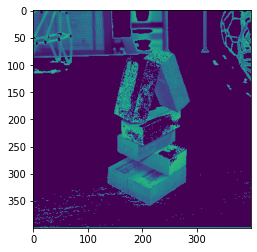

In [ ]:
plt.imshow(img)

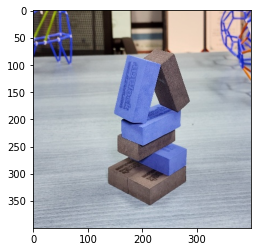

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset/test/TEST_00000.jpg')

# 변환 graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 임계값 조절
mask = cv2.threshold(gray, 400, 400, cv2.THRESH_BINARY)[1]

# mask
mask = 255 - mask

# morphology 적용
# borderconstant 사용
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

plt.imshow(result)